In [1]:
import pandas as pd
import itertools
import time
import json
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
import seaborn as sns
import shutil

# BATS reference

In [3]:
df_evaluation_bats = pd.read_csv("../data/tunning/evaluation_bats.csv",sep=";")
df_evaluation_bats.head()

,models_filename,type_model,windows,dim_emb,ref_err_dis_cos,ref_rmse_dis_cos,ref_err_moy_freq,ref_rmse_freq
0,cbow_4_20.kv,cbow,4,20,-0.656288,0.700103,0.148443,0.400323
1,cbow_10_300.kv,cbow,10,300,-0.779008,0.796776,0.143089,0.406280
2,cbow_8_140.kv,cbow,8,140,-0.763201,0.782621,0.147788,0.405896
3,skipgram_10_280.kv,skipgram,10,280,-0.748005,0.767755,0.318122,0.515386
4,cbow_7_300.kv,cbow,7,300,-0.775628,0.793835,0.142745,0.403255


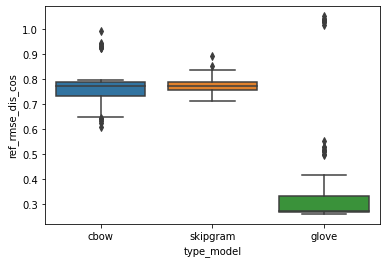

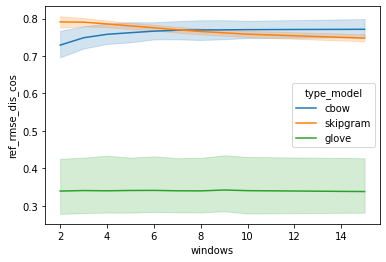

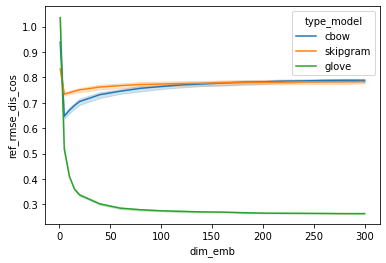

In [4]:
# Plot RMSE DIS COS
sns.boxplot(x="type_model",y="ref_rmse_dis_cos",data=df_evaluation_bats)
plt.show()
sns.lineplot(x="windows",y="ref_rmse_dis_cos",hue="type_model",data=df_evaluation_bats)
plt.show()
sns.lineplot(x="dim_emb",y="ref_rmse_dis_cos",hue="type_model",data=df_evaluation_bats)
plt.show()

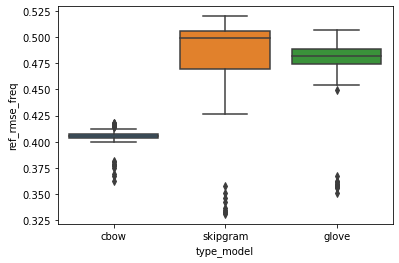

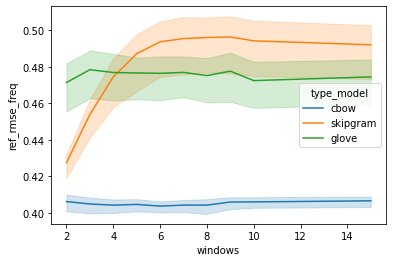

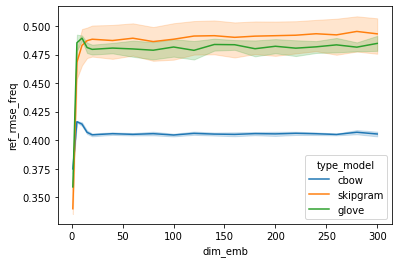

In [5]:
# Plot RMSE FREQ
sns.boxplot(x="type_model",y="ref_rmse_freq",data=df_evaluation_bats)
plt.show()
sns.lineplot(x="windows",y="ref_rmse_freq",hue="type_model",data=df_evaluation_bats)
plt.show()
sns.lineplot(x="dim_emb",y="ref_rmse_freq",hue="type_model",data=df_evaluation_bats)
plt.show()

In [8]:
# Best model
best_models = df_evaluation_bats.loc[df_evaluation_bats.groupby("type_model")["ref_rmse_dis_cos"].idxmin()]
print(best_models)
best_glove_filename = best_models.loc[best_models["type_model"] == "glove"]["models_filename"].values[0]
best_cbow_filename = best_models["models_filename"].loc[best_models["type_model"] == "cbow"].values[0]
best_skipgram_filename = best_models["models_filename"].loc[best_models["type_model"] == "skipgram"].values[0]

#Load model as Keyedvectors
best_glove = KeyedVectors.load_word2vec_format(f"../data/training_models/{best_glove_filename}")
best_cbow = KeyedVectors.load_word2vec_format(f"../data/training_models/{best_cbow_filename}")
best_skipgram = KeyedVectors.load_word2vec_format(f"../data/training_models/{best_skipgram_filename}")

     models_filename type_model  windows  dim_emb  ref_err_dis_cos  \
192      cbow_2_5.kv       cbow        2        5        -0.423823   
125  glove_10_300.kv      glove       10      300         0.196886   
118  skipgram_2_5.kv   skipgram        2        5        -0.673534   

     ref_rmse_dis_cos  ref_err_moy_freq  ref_rmse_freq  
192          0.608565          0.181264       0.417234  
125          0.259422          0.277005       0.472056  
118          0.710756          0.211039       0.426897  


In [9]:
lemm_test = "dechet"

print(f"Glove most similaire to {lemm_test}: \n{best_glove.most_similar(lemm_test)}\n")
print(f"Cbow most similaire to {lemm_test}: \n{best_cbow.most_similar(lemm_test)}\n")
print(f"skipgram most similaire to {lemm_test}: \n{best_skipgram.most_similar(lemm_test)}")

Glove most similaire to dechet: 
[('produire', 0.21669083833694458), ('mercure', 0.19848056137561798), ('votee', 0.1929606944322586), ('banquette', 0.19027914106845856), ('embouteillage', 0.1862686276435852), ('redonner', 0.18548282980918884), ('plant', 0.17312553524971008), ('tva', 0.1728728860616684), ('extremement', 0.17108896374702454), ('lourd', 0.16794127225875854)]

Cbow most similaire to dechet: 
[('region', 0.9995194673538208), ('main', 0.9994471073150635), ('localement', 0.9992453455924988), ('poubelle', 0.9990654587745667), ('idee', 0.9988109469413757), ('quartier', 0.9987856149673462), ('abattoir', 0.9987754821777344), ('individu', 0.9987151622772217), ('rien', 0.9986613988876343), ('engager', 0.9985846281051636)]

skipgram most similaire to dechet: 
[('antibiotique', 0.9984840750694275), ('greenwashing', 0.998382568359375), ('shampooing', 0.99803626537323), ('co_deux', 0.9966737031936646), ('fermement', 0.9961792230606079), ('verifier', 0.9960604906082153), ('placement', 0

In [10]:
# Select best model
shutil.copy2(src=f"../data/training_models/{best_glove_filename}",dst="../data/tunning/glove.kv")
shutil.copy2(src=f"../data/training_models/{best_cbow_filename}",dst="../data/tunning/cbow.kv")
shutil.copy2(src=f"../data/training_models/{best_skipgram_filename}",dst="../data/tunning/skipgram.kv")

'../data/tunning/skipgram.kv'

# Tag similarity

In [77]:

df_evaluation_tags = pd.read_csv("../data/tunning/evaluation_tags.csv",sep=";")
df_evaluation_tags.head()

,models_filename,type_model,windows,dim_emb,tag_mse,ref_err_dis_cos,ref_rmse_dis_cos,ref_err_moy_freq,ref_rmse_freq
0,skipgramm_9_150.kv,skipgramm,9,150,0.152236,-0.733524,0.752030,0.325559,0.489653
1,glove_10_50.kv,glove,10,50,0.134375,0.237388,0.312297,0.392250,0.512343
2,skipgramm_8_50.kv,skipgramm,8,50,0.148428,-0.720908,0.741574,0.329218,0.491595
3,glove_7_30.kv,glove,7,30,0.140853,0.225437,0.334514,0.366774,0.487065
4,skipgramm_8_10.kv,skipgramm,8,10,0.135562,-0.701923,0.722056,0.313632,0.472125


In [11]:
df_tag_similarity = pd.read_csv("../data/tunning/tag_similiraty.csv",sep=";",index_col=0)
df_tag_similarity.head()

,maladie,bateau,kilomètre,lobbying,coherence,paquebot,efforcer,utilise,dent,bio,...,prelever,abrite,crique,forme,vegetation,arborer,couture,universitaire,sdf,precaution
maladie,1.000000,0.793442,0.821735,0.773087,0.751749,0.766154,0.000000,0.785872,0.709372,0.799103,...,0.631169,0.405751,0.246932,0.854790,0.721913,0.811503,0.567561,0.405751,0.321012,0.699400
bateau,0.793442,1.000000,0.978896,0.724264,0.695846,0.898622,0.028287,0.854019,0.564587,0.804073,...,0.750630,0.381089,0.360536,0.813316,0.630572,0.513893,0.559548,0.386863,0.268820,0.773181
kilomètre,0.821735,0.978896,1.000000,0.729316,0.699683,0.864785,0.014942,0.851120,0.622170,0.835807,...,0.689306,0.457504,0.347478,0.852828,0.672032,0.524605,0.576850,0.427004,0.287338,0.772005
lobbying,0.773087,0.724264,0.729316,1.000000,0.875828,0.680485,0.129641,0.865158,0.691493,0.798446,...,0.740959,0.449868,0.463817,0.871533,0.618666,0.688033,0.604306,0.449868,0.391345,0.745434
coherence,0.751749,0.695846,0.699683,0.875828,1.000000,0.602595,0.000000,0.771800,0.603392,0.763177,...,0.715829,0.463184,0.369012,0.825992,0.647291,0.589506,0.517769,0.463184,0.230633,0.807947


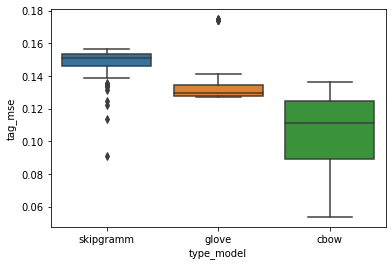

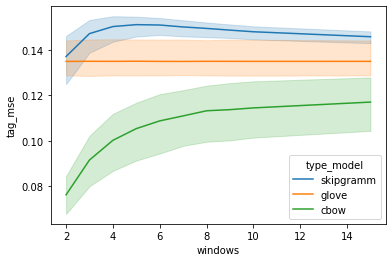

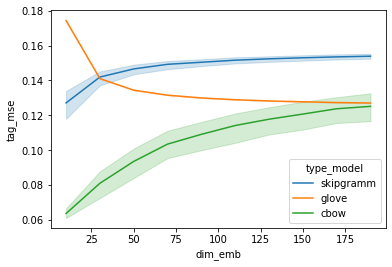

In [79]:
sns.boxplot(x="type_model",y="tag_mse",data=df_evaluation_tags)
plt.show()
sns.lineplot(x="windows",y="tag_mse",hue="type_model",data=df_evaluation_tags)
plt.show()
sns.lineplot(x="dim_emb",y="tag_mse",hue="type_model",data=df_evaluation_tags)
plt.show()

In [80]:
# Best model
best_models = df_evaluation_tags.loc[df_evaluation_tags.groupby("type_model")["tag_mse"].idxmin()]
print(best_models)
best_glove_filename = best_models.loc[best_models["type_model"] == "glove"]["models_filename"].values[0]
best_cbow_filename = best_models["models_filename"].loc[best_models["type_model"] == "cbow"].values[0]
best_skipgram_filename = best_models["models_filename"].loc[best_models["type_model"] == "skipgram"].values[0]

#Load model as Keyedvectors
best_glove = KeyedVectors.load_word2vec_format(f"../data/training_models/{best_glove_filename}")
best_cbow = KeyedVectors.load_word2vec_format(f"../data/training_models/{best_cbow_filename}")
best_skipgram = KeyedVectors.load_word2vec_format(f"../data/training_models/{best_skipgram_filename}")

       models_filename type_model  windows  dim_emb   tag_mse  \
83        cbow_2_30.kv       cbow        2       30  0.053783   
209     glove_2_190.kv      glove        2      190  0.126940   
156  skipgramm_2_10.kv  skipgramm        2       10  0.091147   

     ref_err_dis_cos  ref_rmse_dis_cos  ref_err_moy_freq  ref_rmse_freq  
83         -0.582375          0.635884          0.224780       0.385784  
209         0.236418          0.295074          0.405391       0.522233  
156        -0.675125          0.702858          0.234600       0.387508  


In [81]:
lemm_test = "dechet"

print(f"Glove most similaire to {lemm_test}: \n{best_glove.most_similar(lemm_test)}\n")
print(f"Cbow most similaire to {lemm_test}: \n{best_cbow.most_similar(lemm_test)}\n")
print(f"skipgram most similaire to {lemm_test}: \n{best_skipgram.most_similar(lemm_test)}")

Glove most similaire to dechet: 
[('senat', 0.2794499099254608), ('etat', 0.2562149167060852), ('emergence', 0.22081968188285828), ('spontan', 0.21975696086883545), ('seveso', 0.2190929502248764), ('selectif', 0.2143162041902542), ('navette', 0.21381334960460663), ('polluscore', 0.21232102811336517), ('perir', 0.2108365148305893), ('minimaliste', 0.20986869931221008)]

Cbow most similaire to dechet: 
[('faire', 0.9995613694190979), ('être', 0.9995603561401367), ('exemple', 0.9995468854904175), ('urbain', 0.9994865655899048), ('imposer', 0.9994609355926514), ('obliger', 0.9994592070579529), ('recyclage', 0.9994381070137024), ('citoyen', 0.9994356036186218), ('poubelle', 0.9994329214096069), ('creer', 0.9994325637817383)]

Skipgramm most similaire to dechet: 
[('poubelle', 0.9915301203727722), ('coefficient', 0.9899822473526001), ('veau', 0.9895740747451782), ('cuvette', 0.9894569516181946), ('present', 0.9886998534202576), ('reduirer', 0.9877720475196838), ('image', 0.9868926405906677),

In [82]:
df_tag_similarity.loc["renouvelable",].sort_values(ascending=False)[:10]

renouvelable      1.000000
photovoltaique    0.954151
eolien            0.946776
flamanville       0.937753
commercial        0.896354
centrale          0.893286
accumuler         0.889630
restituer         0.889630
ile               0.887519
investir          0.887115
Name: renouvelable, dtype: float64